<a href="https://colab.research.google.com/github/SARA3SAEED/LLM-2/blob/main/40_Day_5_Week_5_Module_6_Advanced_Autogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyautogen dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 817.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2

In [ ]:
import autogen
from autogen import AssistantAgent, UserProxyAgent
from google.colab import userdata

llm_config = {"model": "gpt-4o", "api_key": "YOUR OPENAI API KEY"}

gpt_vision_config = {
    "config_list": [{"model": "gpt-4-vision-preview", "api_key": "YOUR OPENAI API KEY"}],
    "timeout": 120,
    "temperature": 0.7,
}
dalle_config = {
    "config_list": [{"model": "dall-e-3", "api_key": "YOUR OPENAI API KEY"}],
    "timeout": 120,
    "temperature": 0.7,
}

In [ ]:
!rm /content/data/scratch/ -rf

In [ ]:
assistant = AssistantAgent(
    name= "assistant", llm_config=llm_config)
user_proxy = UserProxyAgent(
    name = "user_proxy",
    code_execution_config={"work_dir":
                           "data/scratch",
                           "use_docker": False},
    human_input_mode="NEVER",
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE")
    )

user_proxy.initiate_chat(assistant, message="Plot a chart of NVDA and TESLA stock price change YTD. Save the result to a file named chart.png.")

user_proxy (to assistant):

Plot a chart of NVDA and TESLA stock price change YTD. Save the result to a file named chart.png.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To accomplish this task, we need to follow these steps:

1. Fetch the stock data for NVDA and TESLA from a financial data source.
2. Compute the Year-To-Date (YTD) changes for both stocks.
3. Plot the calculated data using a plotting library like Matplotlib.
4. Save the plot to a file named `chart.png`.

Here's the complete Python script to achieve the above steps:

```python
# filename: plot_stock_ytd.py

import matplotlib.pyplot as plt
import yfinance as yf
import datetime

# Define the ticker symbols
stocks = ['NVDA', 'TSLA']

# Get today's date and the first day of the current year
today = datetime.datetime.today()
first_day_of_year = datetime.datetime(today.year, 1, 1)

# Download the stock data
data = yf.download(stocks, start=first_day_of_year, en

ChatResult(chat_id=None, chat_history=[{'content': 'Plot a chart of NVDA and TESLA stock price change YTD. Save the result to a file named chart.png.', 'role': 'assistant', 'name': 'user_proxy'}, {'content': 'To accomplish this task, we need to follow these steps:\n\n1. Fetch the stock data for NVDA and TESLA from a financial data source.\n2. Compute the Year-To-Date (YTD) changes for both stocks.\n3. Plot the calculated data using a plotting library like Matplotlib.\n4. Save the plot to a file named `chart.png`.\n\nHere\'s the complete Python script to achieve the above steps:\n\n```python\n# filename: plot_stock_ytd.py\n\nimport matplotlib.pyplot as plt\nimport yfinance as yf\nimport datetime\n\n# Define the ticker symbols\nstocks = [\'NVDA\', \'TSLA\']\n\n# Get today\'s date and the first day of the current year\ntoday = datetime.datetime.today()\nfirst_day_of_year = datetime.datetime(today.year, 1, 1)\n\n# Download the stock data\ndata = yf.download(stocks, start=first_day_of_year,

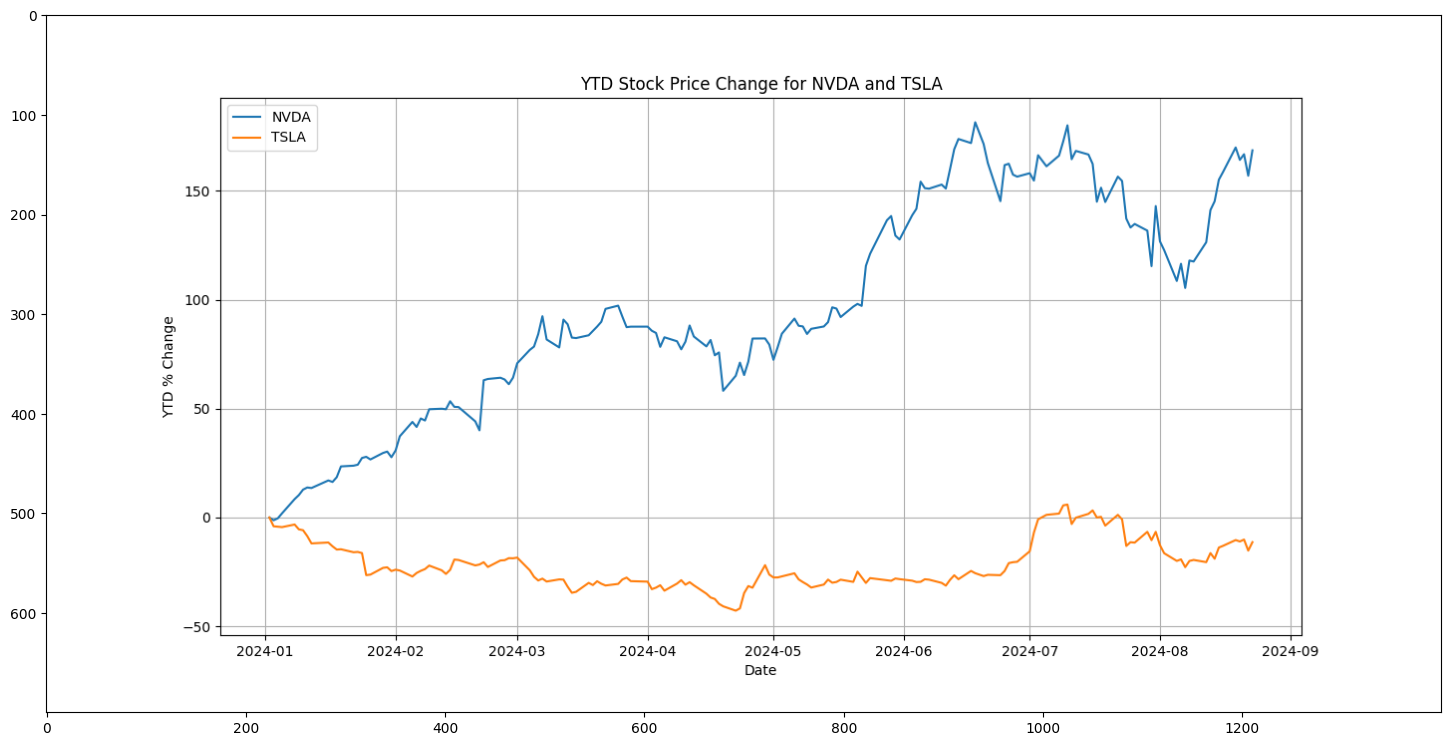

In [ ]:
# view the resulting image chart.png
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.imshow(plt.imread("data/scratch/chart.png"));

In [ ]:
user_proxy.chat_messages

defaultdict(list,
            {<autogen.agentchat.assistant_agent.AssistantAgent at 0x79bea447f9d0>: [{'content': 'Plot a chart of NVDA and TESLA stock price change YTD. Save the result to a file named chart.png.',
               'role': 'assistant',
               'name': 'user_proxy'},
              {'content': 'To accomplish this task, we need to follow these steps:\n\n1. Fetch the stock data for NVDA and TESLA from a financial data source.\n2. Compute the Year-To-Date (YTD) changes for both stocks.\n3. Plot the calculated data using a plotting library like Matplotlib.\n4. Save the plot to a file named `chart.png`.\n\nHere\'s the complete Python script to achieve the above steps:\n\n```python\n# filename: plot_stock_ytd.py\n\nimport matplotlib.pyplot as plt\nimport yfinance as yf\nimport datetime\n\n# Define the ticker symbols\nstocks = [\'NVDA\', \'TSLA\']\n\n# Get today\'s date and the first day of the current year\ntoday = datetime.datetime.today()\nfirst_day_of_year = datetime.d

write an article about why ai growth guys is the best website for learning AI and internet marketing.  Write the article once as your first personality, and then use your other personalities
to make improvements.  In the end, give me the finished article that I can post on my website.  Make sure this article is at least 1500 words long.  If it is shorter, re write it until you succeed.
we are running this on google colab also so please don't use any localhost or try to install things that are impossible on this environment.

In [ ]:
!rm /content/data/article -rf

In [ ]:
assistant = AssistantAgent(
    name= "assistant", llm_config=llm_config)
user_proxy = UserProxyAgent(
    name = "user_proxy",
    code_execution_config={"work_dir":
                           "data/article",
                           "use_docker": False},
    human_input_mode="NEVER",
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE")
    )

user_proxy.initiate_chat(assistant, message="""
write an article about the performance of  NVDA and Google and TESLA stock price change YTD.  Write the article once as your first personality, and then use your other personalities
to make improvements.  In the end, give me the finished article that I can post on my website.  Make sure this article is at least 500 words long.  If it is shorter, re write it until you succeed.
we are running this on google colab also so please don't use any localhost or try to install things that are impossible on this environment. Save the result to a file named article.txt


""")

user_proxy (to assistant):


write an article about the performance of  NVDA and Google and TESLA stock price change YTD.  Write the article once as your first personality, and then use your other personalities
to make improvements.  In the end, give me the finished article that I can post on my website.  Make sure this article is at least 500 words long.  If it is shorter, re write it until you succeed.
we are running this on google colab also so please don't use any localhost or try to install things that are impossible on this environment. Save the result to a file named article.txt




--------------------------------------------------------------------------------
assistant (to user_proxy):

Let's break down the task:

1. Collect the necessary stock price data for NVDA (NVIDIA), GOOGL (Google/Alphabet), and TSLA (Tesla) to analyze their Year-To-Date (YTD) performance.
2. Write an initial draft of the article based on the data collected.
3. Enhance the article using the second pers

In [ ]:
!rm /content/data/presentation -rf

In [ ]:
import os
import re
from typing import Dict, Optional

from IPython.display import display
from PIL.Image import Image

import autogen
from autogen.agentchat.contrib import img_utils
from autogen.agentchat.contrib.capabilities import generate_images
from autogen.cache import Cache
from autogen.oai import openai_utils

In [ ]:
# # Initialize the AssistantAgent with both LLM and Vision capabilities
# assistant = AssistantAgent(llm_config=llm_config, vision_config=gpt_vision_config, dalle_config=dalle_config)

# # Create a UserProxyAgent to interact with the Assistant
# user_proxy = UserProxyAgent(assistant)


In [ ]:
agent = autogen.ConversableAgent(
        name="dalle",
        llm_config=gpt_vision_config,
        max_consecutive_auto_reply=3,
        human_input_mode="NEVER",
        is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE")
    )

In [ ]:
assistant = AssistantAgent(
    name= "assistant", llm_config=llm_config)
user_proxy = UserProxyAgent(
    name = "user_proxy",
    code_execution_config={"work_dir":
                           "data/presentation",
                           "use_docker": False},
    human_input_mode="NEVER",
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE")
    )

user_proxy.initiate_chat(assistant, message="Make a deck on different techniques of prompt engineering with examples. Make sure the deck is at least 10 slides. Save the result to a powerpoint file named pitchdeck.pptx")